In [536]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix
import random
from statistics import mean
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [537]:
np.random.seed(40)

In [538]:
df = pd.read_csv("fruit_data_with_colors.txt",delimiter = "\t")


In [539]:
df=df.drop('fruit_label', axis=1)

In [540]:
df1=df.sample(n=4)

In [541]:
df1=df1.drop(['fruit_name','fruit_subtype'],axis=1)

In [542]:
X = df[["mass","width","height","color_score"]]

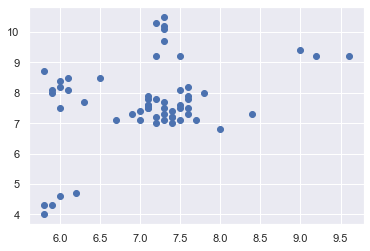

In [543]:
plt.scatter(df['width'],df['height'])
plt.show()

In [544]:
def euclidian_distance(query,X):
        difference = np.array(X) - np.array(query)
        sqrd_diff = np.square(difference)
        sum_sqrd_diff = np.sum(sqrd_diff, axis = 1)
        distance = np.sqrt(sum_sqrd_diff)
        return distance

In [545]:
c=np.array(df1)
c

array([[ 84.  ,   6.  ,   4.6 ,   0.79],
       [190.  ,   7.5 ,   8.1 ,   0.74],
       [160.  ,   7.5 ,   7.5 ,   0.86],
       [118.  ,   6.1 ,   8.1 ,   0.7 ]])

In [546]:
xd=np.array(X)


In [547]:
euclidian_distance(xd[0],c)

array([108.06066629,   2.34224252,  32.0147794 ,  74.04020867])

In [553]:
for j in range(10):
    c1=[]
    c2=[]
    c3=[]
    c4=[]

    for i in range(len(xd)):
        index=np.argmin(euclidian_distance(xd[i],c))
        if index==0:
            c1.append(xd[i])
        elif index==1:
            c2.append(xd[i])
        elif index==2:
            c3.append(xd[i])
        else:
            c4.append(xd[i])
            
            
        
    c[0]=np.array(np.mean(c1,axis=0))
    c[1]=np.array(np.mean(c2,axis=0))
    c[2]=np.array(np.mean(c3,axis=0))
    c[3]=np.array(np.mean(c4,axis=0))
    

    

    

[112.35294118   6.2          6.88823529   0.75294118] [3.0e+04 7.1e+00 7.5e+00 7.8e-01] [1.0e+03 7.6e+00 7.5e+00 6.7e-01] [185.35      7.49      8.0475    0.76925]


In [555]:
c[0],c[1],c[2],c[3]

(array([112.35294118,   6.2       ,   6.88823529,   0.75294118]),
 array([3.0e+04, 7.1e+00, 7.5e+00, 7.8e-01]),
 array([1.0e+03, 7.6e+00, 7.5e+00, 6.7e-01]),
 array([185.35   ,   7.49   ,   8.0475 ,   0.76925]))

In [556]:
c1,c2,c3,c4

([array([86. ,  6.2,  4.7,  0.8]),
  array([84.  ,  6.  ,  4.6 ,  0.79]),
  array([80.  ,  5.8 ,  4.3 ,  0.77]),
  array([80.  ,  5.9 ,  4.3 ,  0.81]),
  array([76.  ,  5.8 ,  4.  ,  0.81]),
  array([140.  ,   7.3 ,   7.1 ,   0.87]),
  array([140.  ,   6.7 ,   7.1 ,   0.72]),
  array([142.  ,   7.6 ,   7.8 ,   0.75]),
  array([132.  ,   5.8 ,   8.7 ,   0.73]),
  array([130.  ,   6.  ,   8.2 ,   0.71]),
  array([116.  ,   6.  ,   7.5 ,   0.72]),
  array([118.  ,   5.9 ,   8.  ,   0.72]),
  array([120.  ,   6.  ,   8.4 ,   0.74]),
  array([116.  ,   6.1 ,   8.5 ,   0.71]),
  array([116.  ,   6.3 ,   7.7 ,   0.72]),
  array([116.  ,   5.9 ,   8.1 ,   0.73]),
  array([118. ,   6.1,   8.1,   0.7])],
 [array([3.0e+04, 7.1e+00, 7.5e+00, 7.8e-01])],
 [array([1.0e+03, 7.6e+00, 7.5e+00, 6.7e-01])],
 [array([192.  ,   8.4 ,   7.3 ,   0.55]),
  array([180.  ,   8.  ,   6.8 ,   0.59]),
  array([176. ,   7.4,   7.2,   0.6]),
  array([178.  ,   7.1 ,   7.8 ,   0.92]),
  array([172.  ,   7.4 ,   7.  ,